### Decision Tree 

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
matplotlib.use("TKAgg")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

%aimport visuals

import visuals_2 as vs

In [10]:
DATASET1='Data/breast-cancer-wisconsin.csv'

In [16]:
df = pd.read_csv(DATASET1)

In [17]:
df

,Id,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [18]:
df = df.drop('Id', axis=1)

In [19]:
df

,Clump thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [20]:
X = df.drop('Class', axis=1)
X = pd.get_dummies(X.astype(str))
y = df[['Class']]
print("X encoded has {} rows and {} features".format(*X.shape))
X.head()

X encoded has 699 rows and 90 features


,Clump thickness_1,Clump thickness_10,Clump thickness_2,Clump thickness_3,Clump thickness_4,Clump thickness_5,Clump thickness_6,Clump thickness_7,Clump thickness_8,Clump thickness_9,...,Normal Nucleoli_9,Mitoses_1,Mitoses_10,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1769)

In [23]:
print("Shape of X_train\t:", X_train.shape)
print("Shape of X_test\t\t:", X_test.shape)
print("Shape of y_train\t:", y_train.shape)
print("Shape of y_test\t\t:", y_test.shape)

Shape of X_train	: (489, 90)
Shape of X_test		: (210, 90)
Shape of y_train	: (489, 1)
Shape of y_test		: (210, 1)


In [24]:

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeClassifier
naive_est = DecisionTreeClassifier()

naive_est.fit(X_train, y_train)
y_pred = naive_est.predict(X_test)
print(y_pred[1:5])

[4 2 2 2]


In [26]:
naive_est.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [28]:
print('min_samples_leaf\t:', naive_est.get_params()['min_samples_leaf'])
print('min_samples_split\t:', naive_est.get_params()['min_samples_split'])
print('max_depth\t\t:', naive_est.tree_.max_depth)
print('node_count\t\t:', naive_est.tree_.node_count)

min_samples_leaf	: 1
min_samples_split	: 2
max_depth		: 11
node_count		: 61


In [29]:
print('Self Score\t:', naive_est.score(X_train, y_train))
print("Accuracy\t:", metrics.accuracy_score(y_test, y_pred))
print("Precision\t:", metrics.precision_score(y_test, y_pred, average="weighted"))

Self Score	: 1.0
Accuracy	: 0.919047619047619
Precision	: 0.918561710398445


              precision    recall  f1-score   support

           2       0.93      0.96      0.94       142
           4       0.90      0.84      0.87        68

    accuracy                           0.92       210
   macro avg       0.91      0.90      0.91       210
weighted avg       0.92      0.92      0.92       210



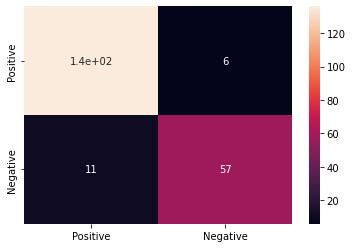

In [35]:
vs.render_confusion_matrix(y_test, y_pred)

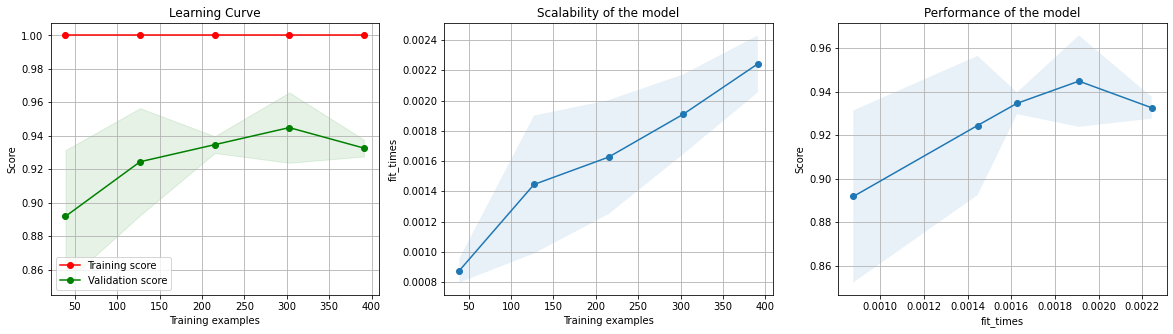

In [36]:
vs.plot_learning_curve(naive_est, X_train, y_train, cv=cv, n_jobs=-1)
plt.show()

[learning_curve] Training set sizes: [ 39 127 215 303 391]
[learning_curve] Training set sizes: [ 39 127 215 303 391]
[learning_curve] Training set sizes: [ 39 127 215 303 391]
[learning_curve] Training set sizes: [ 39 127 215 303 391]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


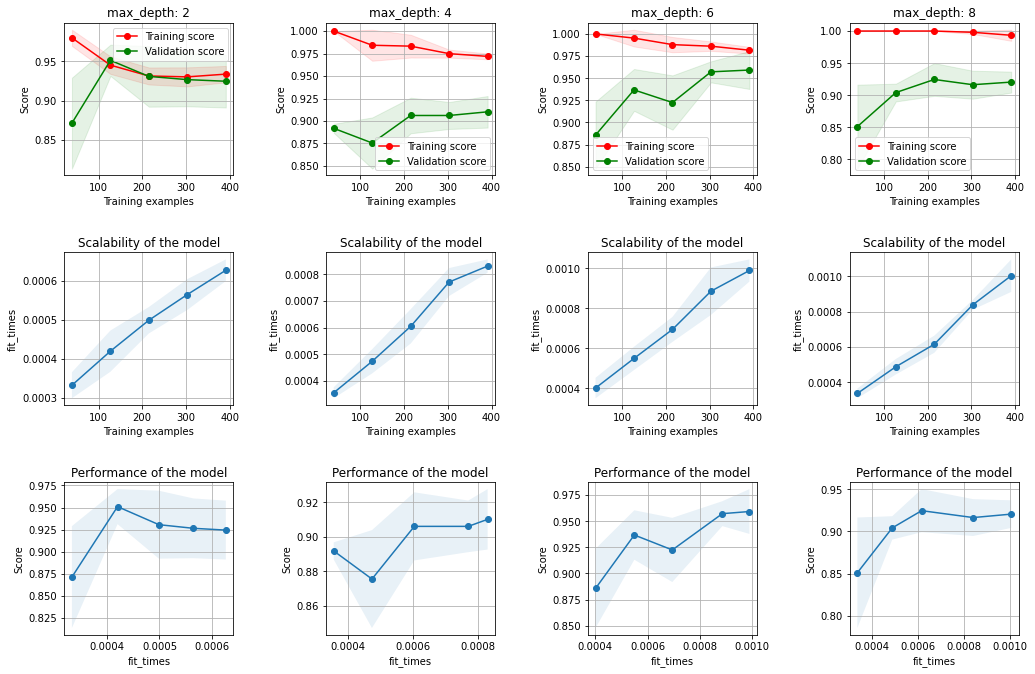

In [37]:
vs.plot_learning_curve_all(
    naive_est,
    X_train,
    y_train,
    param='max_depth',
    values=[2,4,6,8],
    cv=cv,
    n_jobs=-1,
    verbose=1
)